In [1]:
import time
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import cfe_orig
import bmi_cfe

In [7]:
cfe2 = bmi_cfe.BMI_CFE('./cat_58_config_cfe.json')
cfe2.initialize()
cfe2.run_unit_test(plot=True)


GLOBAL MASS BALANCE
  initial volume:   0.5956
    volume input:   0.4548
   volume output:   0.1789
    final volume:   0.8642
        residual: 1.4658e-16

SCHAAKE MASS BALANCE
  surface runoff:   0.1863
    infiltration:   0.2686
schaake residual: -1.1102e-16

GIUH MASS BALANCE
  vol. into giuh:   0.1863
   vol. out giuh:   0.1789
 vol. end giuh q:   0.0074
   giuh residual: 1.1883e-16

SOIL WATER CONCEPTUAL RESERVOIR MASS BALANCE
   init soil vol:   0.5856
  vol. into soil:   0.2686
vol.soil2latflow:   0.0000
 vol. soil to gw:   0.0000
 final vol. soil:   0.8542
vol. soil resid.: 1.1102e-16

NASH CASCADE CONCEPTUAL RESERVOIR MASS BALANCE
    vol. to nash:   0.0000
  vol. from nash:   0.0000
 final vol. nash:   0.0000
nash casc resid.: 0.0000e+00

GROUNDWATER CONCEPTUAL RESERVOIR MASS BALANCE
init gw. storage:   0.0100
       vol to gw:   0.0000
     vol from gw:   0.0000
final gw.storage:   0.0100
    gw. residual: 0.0000e+00


In [3]:
with open(cfe2.forcing_file, 'r') as f:
    df_forcing = pd.read_csv(f)

In [4]:
outputs=cfe2.get_output_var_names()

In [5]:
cfe2.initialize()
output_lists = {output:[] for output in outputs}
for precip in df_forcing['APCP_surface']:
    cfe2.set_value('atmosphere_water__time_integral_of_precipitation_mass_flux', precip)
    cfe2.update()
    for output in outputs:
        output_lists[output].append(cfe2.get_value(output))
cfe2.finalize_mass_balance()


GLOBAL MASS BALANCE
  initial volume:   0.5956
    volume input: 259.2000
   volume output: 248.2436
    final volume:   0.8880
        residual: 8.3489e-14

SCHAAKE MASS BALANCE
  surface runoff: 258.9076
    infiltration:   0.2924
schaake residual: 3.0087e-14

GIUH MASS BALANCE
  vol. into giuh: 258.9076
   vol. out giuh: 248.2436
 vol. end giuh q:  10.6640
   giuh residual: 7.1054e-14

SOIL WATER CONCEPTUAL RESERVOIR MASS BALANCE
   init soil vol:   0.5856
  vol. into soil:   0.2924
vol.soil2latflow:   0.0000
 vol. soil to gw:   0.0000
 final vol. soil:   0.8780
vol. soil resid.: 1.1102e-16

NASH CASCADE CONCEPTUAL RESERVOIR MASS BALANCE
    vol. to nash:   0.0000
  vol. from nash:   0.0000
 final vol. nash:   0.0000
nash casc resid.: 0.0000e+00

GROUNDWATER CONCEPTUAL RESERVOIR MASS BALANCE
init gw. storage:   0.0100
       vol to gw:   0.0000
     vol from gw:   0.0000
final gw.storage:   0.0100
    gw. residual: 0.0000e+00


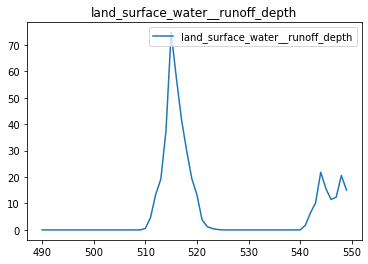

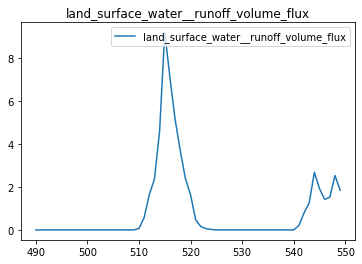

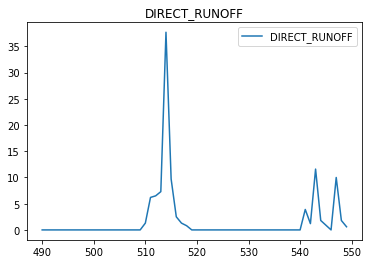

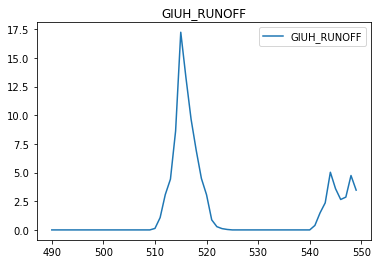

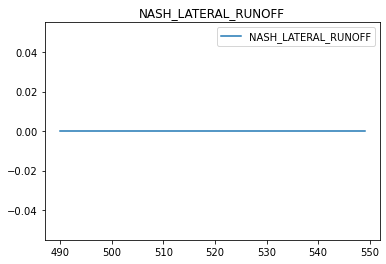

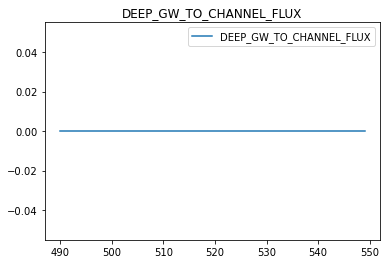

In [6]:
istart_plot=490
iend_plot=550
x = list(range(istart_plot, iend_plot))
for output in outputs:
    plt.plot(x, output_lists[output][istart_plot:iend_plot], label=output)
    plt.title(output)
    plt.legend()
    plt.show()
    plt.close()